In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm


In [2]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [3]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


(a) Use the sm.OLS() function to perform a simple linear regression
with mpg as the response and horsepower as the predictor. Use
the summarize() function to print the results. Comment on the
output. For example:
i. Is there a relationship between the predictor and the response?
ii. How strong is the relationship between the predictor and
the response?
iii. Is the relationship between the predictor and the response
positive or negative?
iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?

i. Is there a relationship between the predictor and the response?
ii. How strong is the relationship between the predictor and
the response?
iii. Is the relationship between the predictor and the response
positive or negative?
iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?

In [4]:
# Auto = load_data("Auto.csv")

In [5]:
Auto = load_data("Auto")
Auto.columns
# load_data?

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [6]:
design = MS(['horsepower'])
x = design.fit_transform(Auto)
x[:4]

,intercept,horsepower
0,1.0,130
1,1.0,165
2,1.0,150
3,1.0,150


In [7]:
y = Auto['mpg']
model = sm.OLS(y,x)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           7.03e-81
Time:                        15:14:08   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
new_df = pd.DataFrame({'horsepower':[98]})
newx = design.transform(new_df)
newx

,intercept,horsepower
0,1.0,98


In [10]:
new_predictions = results.get_prediction(newx);
new_predictions.predicted_mean

array([24.46707715])

confidence intervals:

In [11]:
new_predictions.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

prediction intervals:

In [12]:
new_predictions.conf_int(obs=True,alpha=0.05)

array([[14.80939607, 34.12475823]])

(b) Plot the response and the predictor in a new set of axes ax. Use
the ax.axline() method or the abline() function defined in the
lab to display the least squares regression line.

In [13]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)


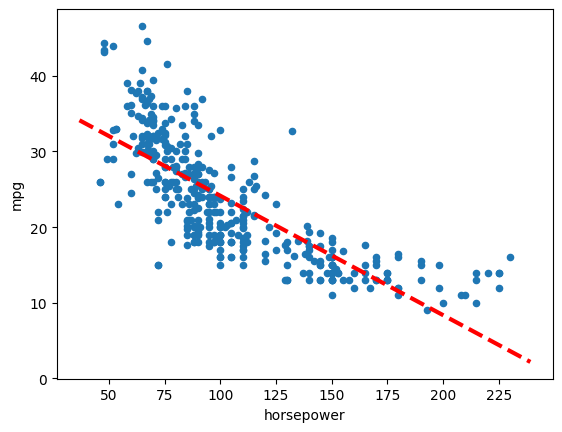

In [14]:
# ax = Boston.plot.scatter('lstat', 'medv')
ax = Auto.plot.scatter('horsepower','mpg')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

(c) Produce some of diagnostic plots of the least squares regression
fit as described in the lab. Comment on any problems you see
with the fit.

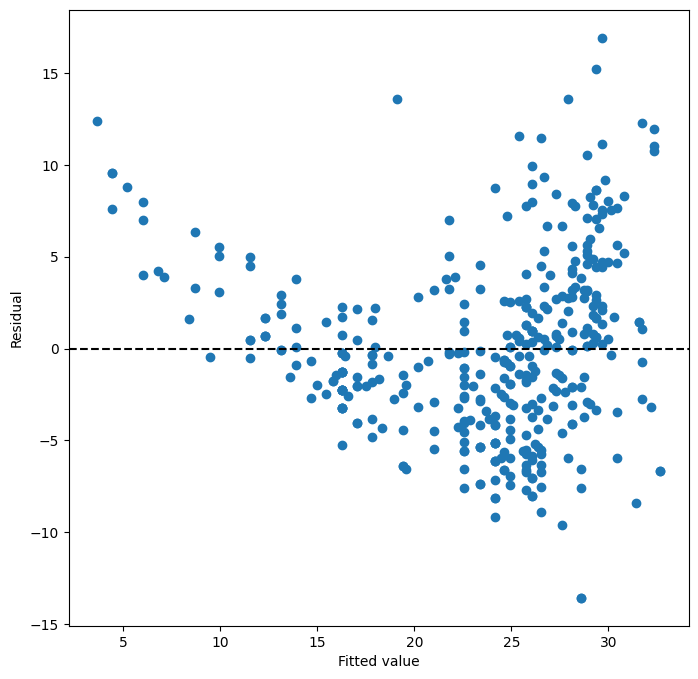

In [15]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

9. This question involves the use of multiple linear regression on the
Auto data set.

(a) Produce a scatterplot matrix which includes all of the variables
in the data set.

In [16]:
terms = Auto.columns
terms

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [17]:
X = MS(terms).fit_transform(Auto)
X

,intercept,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1.0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1.0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,1.0,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,1.0,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,1.0,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
387,1.0,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,1.0,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,1.0,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,1.0,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


(b) Compute the matrix of correlations between the variables using
the DataFrame.corr() method.

In [18]:
Auto.corr?

Signature:
Auto.corr(
    method: 'str | Callable[[np.ndarray, np.ndarray], float]' = 'pearson',
    min_periods: 'int' = 1,
    numeric_only: 'bool | lib.NoDefault' = <no_default>,
) -> 'DataFrame'
Docstring:
Compute pairwise correlation of columns, excluding NA/null values.

Parameters
----------
method : {'pearson', 'kendall', 'spearman'} or callable
    Method of correlation:

    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation
    * callable: callable with input two 1d ndarrays
        and returning a float. Note that the returned matrix from corr
        will have 1 along the diagonals and will be symmetric
        regardless of the callable's behavior.
min_periods : int, optional
    Minimum number of observations required per pair of columns
    to have a valid result. Currently only available for Pearson
    and Spearman correlation.
numeric_only : bool, default True
    Include only `f

In [19]:
Auto.corr()

C:\Users\天宣\AppData\Local\Temp\ipykernel_16488\340684133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [20]:
new_terms = Auto.columns.drop(['name','mpg'])
new_terms

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [21]:
X = MS(new_terms).fit_transform(Auto)
M_model = sm.OLS(y,X)
results = M_model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [22]:
vals = [VIF(X,i)
        for i in range(1,X.shape[1])]
vif = pd.DataFrame({'vif':vals},index=X.columns[1:])

vif


,vif
cylinders,10.737535
displacement,21.836792
horsepower,9.943693
weight,10.831260
acceleration,2.625806
year,1.244952
origin,1.772386


Produce some of diagnostic plots of the linear regression fit as
described in the lab. Comment on any problems you see with the
fit. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?

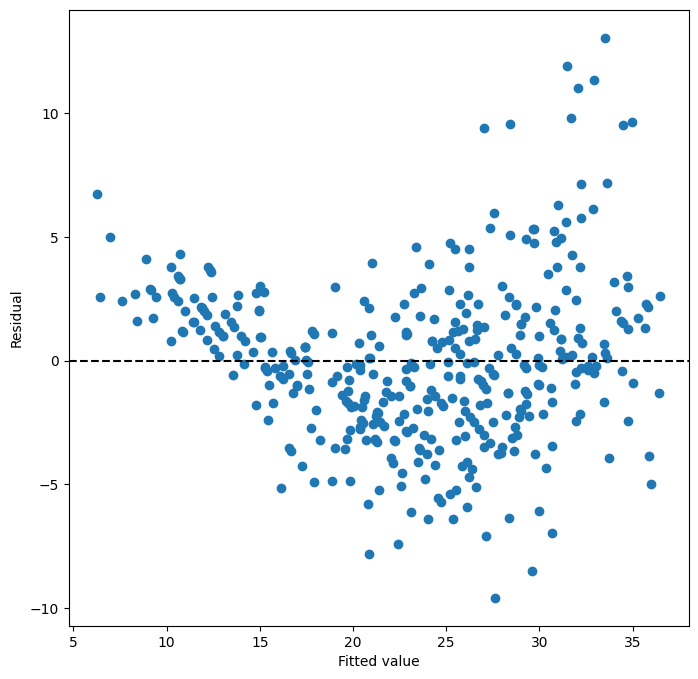

In [23]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

13

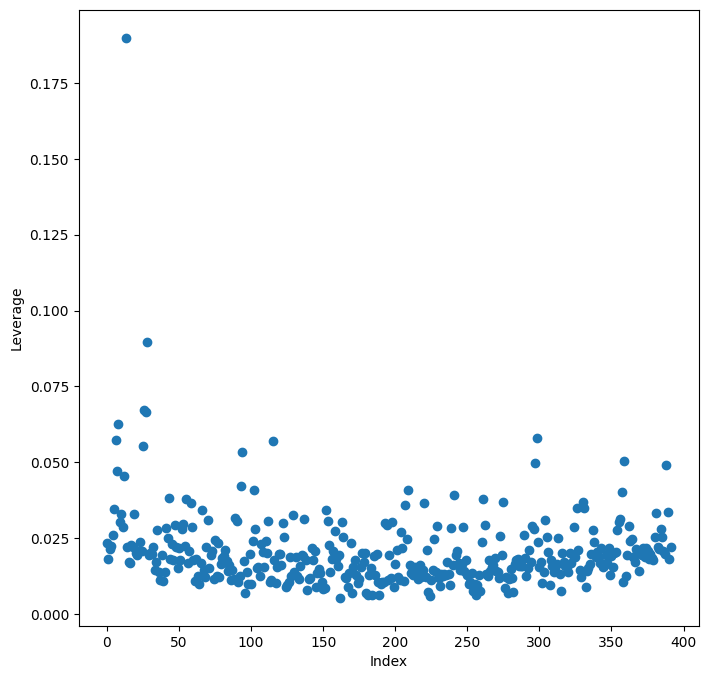

In [24]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)


Fit some models with interactions as described in the lab. Do
any interactions appear to be statistically significant?

我的疑问：是VIF值大的两个来拟合并且添加了interaction后会变得好吗，还是相反？（不过书上好像有讲到）

In [25]:
x1 = MS(['acceleration','year','origin']).fit_transform(Auto)
model_no_inter = sm.OLS(y,x1)
summarize(model_no_inter.fit())
model_no_inter.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     187.3
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           4.36e-75
Time:                        15:14:08   Log-Likelihood:                -1185.7
No. Observations:                 392   AIC:                             2379.
Df Residuals:                     388   BIC:                             2395.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -63.2873      5.249    -12.056      0.000     -73.608     -52.967
acceleration     0.5685      0.097      5.840      0.000       0.377       0.760
year             0.9363      0.072     12.927      0.000       0.794       1.079
origin           4.2850      0.324     13.209      0.000       3.647       4.923
==============================================================================
Omnibus:                       14.436   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.460
Skew:                           0.480   Prob(JB):                     0.000439
Kurtosis:                       2.842   Cond. No.                     1.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
x2 = MS(['acceleration','year','origin',('year','origin')]).fit_transform(Auto)
model_inter = sm.OLS(y,x2)
summarize(model_inter.fit())
model_inter.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     140.6
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           4.48e-74
Time:                        15:14:08   Log-Likelihood:                -1185.3
No. Observations:                 392   AIC:                             2381.
Df Residuals:                     387   BIC:                             2400.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -72.3351     11.729     -6.167      0.000     -95.396     -49.274
acceleration     0.5525      0.099      5.573      0.000       0.358       0.747
year             1.0578      0.158      6.680      0.000       0.746       1.369
origin          10.0682      6.712      1.500      0.134      -3.128      23.264
year:origin     -0.0752      0.087     -0.863      0.389      -0.247       0.096
==============================================================================
Omnibus:                       13.772   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.681
Skew:                           0.467   Prob(JB):                     0.000649
Kurtosis:                       2.832   Cond. No.                     8.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
poly?



Signature: poly(col, degree=1, intercept=False, raw=False, name=None)
Docstring:
Create a polynomial Feature
for a given column.

Additional `args` and `kwargs`
are passed to `Poly`.

Parameters
----------

col : column identifier or Column
    Column to transform.

degree : int, default=1
    Degree of polynomial.

intercept : bool, default=False
    Include a column for intercept?

raw : bool, default=False
    If False, perform a QR decomposition on the resulting
    matrix of powers of centered and / or scaled features.

name : str (optional)
    Defaults to one derived from col.

Returns
-------

var : Feature
File:      d:\anaconda3\envs\islp3\lib\site-packages\islp\models\model_spec.py
Type:      function

Try a few different transformations of the variables, such as
log(X),
√
X, X2. Comment on your findings.

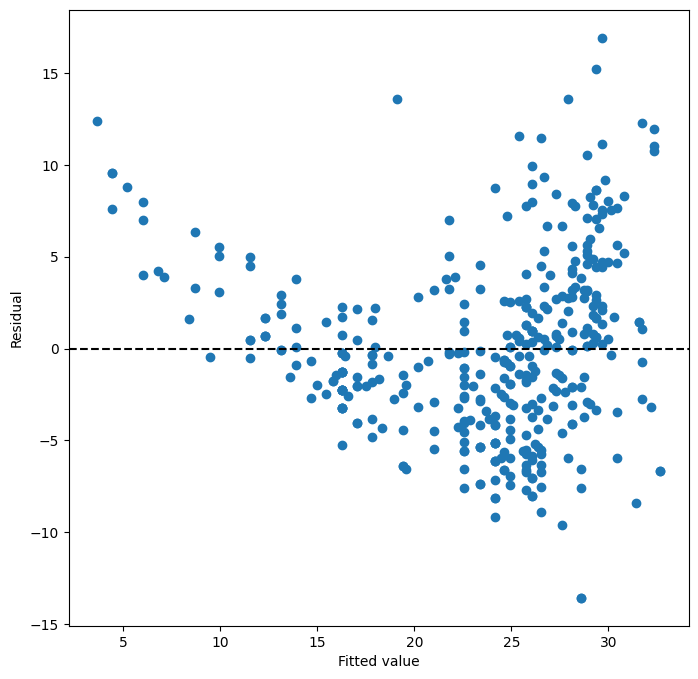

In [28]:
design = MS(['horsepower'])
x = design.fit_transform(Auto)
x[:4]

y = Auto['mpg']
model = sm.OLS(y,x)
results = model.fit()
summarize(results)

ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');


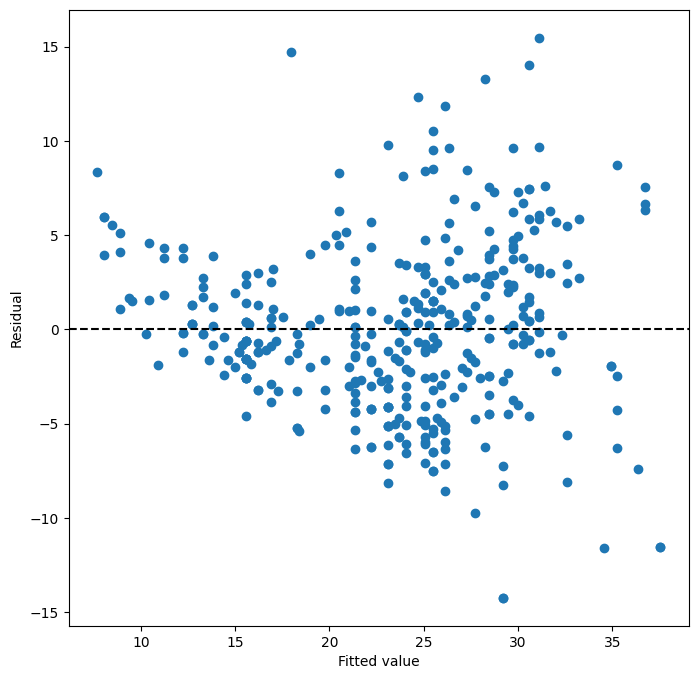

In [29]:
Auto['log_horsepower'] = np.log(Auto['horsepower'])

x = MS(['log_horsepower']).fit_transform(Auto)

model = sm.OLS(y,x)
results = model.fit()

ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');


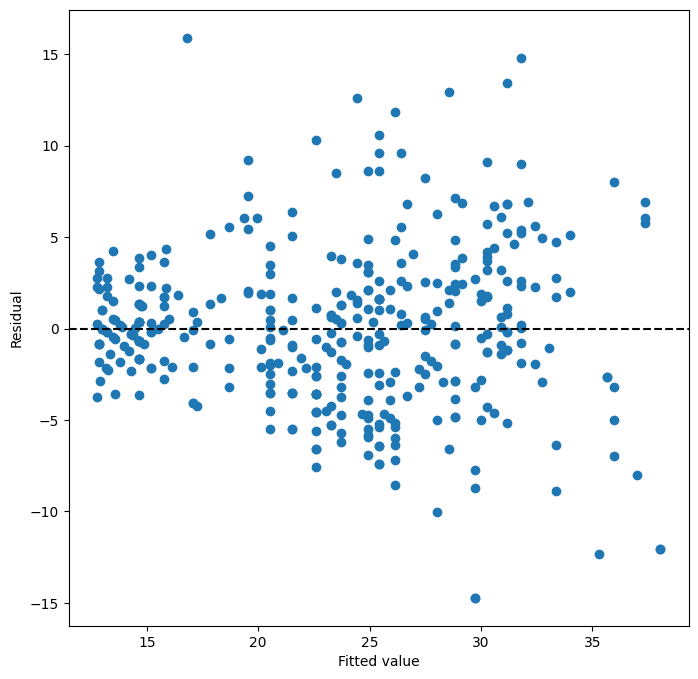

In [30]:
X = MS([poly('horsepower', degree=2)]).fit_transform(Auto)
model3 = sm.OLS(y, X)
results3 = model3.fit()
# summarize(results3)
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');


10. This question should be answered using the Carseats data set.

(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.

In [31]:
carseats = load_data('Carseats')
carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [32]:
# x10 = MS(['Price','Urban','US'])
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [33]:
x10 = MS(['Price','Urban','US']).fit_transform(carseats)
y = carseats['Sales']

model_10 = sm.OLS(y,x10)
result_10 = model_10.fit()


(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

In [34]:
summarize(result_10)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


In [35]:
result_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           2.39e-23
Time:                        15:14:09   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(c) Write out the model in equation form, being careful to handle
the qualitative variables properly.

y = b1x1 + b2x2 + b3x3 + b0

(d) For which of the predictors can you reject the null hypothesis
H0 : βj = 0?

书上的原话：Rather than rely on the individual coefficients, we can use an F-test
to test
0; this does not depend on the coding. This F-test
H0:β
=
β
=
has a p-value of 0.96, indicating that we cannot reject the null hypothesis
that there is no relationship between
and region.
balance

但是ch03中好像没有提到如何进行F-test? 现在看p值只能确定Us 和 Price can reject the H0

(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

In [36]:
x11 = MS(['Price','US']).fit_transform(carseats)
y = carseats['Sales']

model_11 = sm.OLS(y,x11)
result_11 = model_11.fit()

In [37]:
result_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           2.66e-24
Time:                        15:14:09   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
anova_lm(result_10, result_11)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,396.0,2420.834671,0.0,NaN,NaN,NaN
1,397.0,2420.874462,-1.0,-0.03979,0.006525,NaN


MY ANSWER: result_11(drop.Urban) better than result_10() 。
1、从R统计量
2、从F统计量
3、从anova_lm()

(g) Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s).

In [39]:
result_11.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


(h) Is there evidence of outliers or high leverage observations in the
model from (e)?

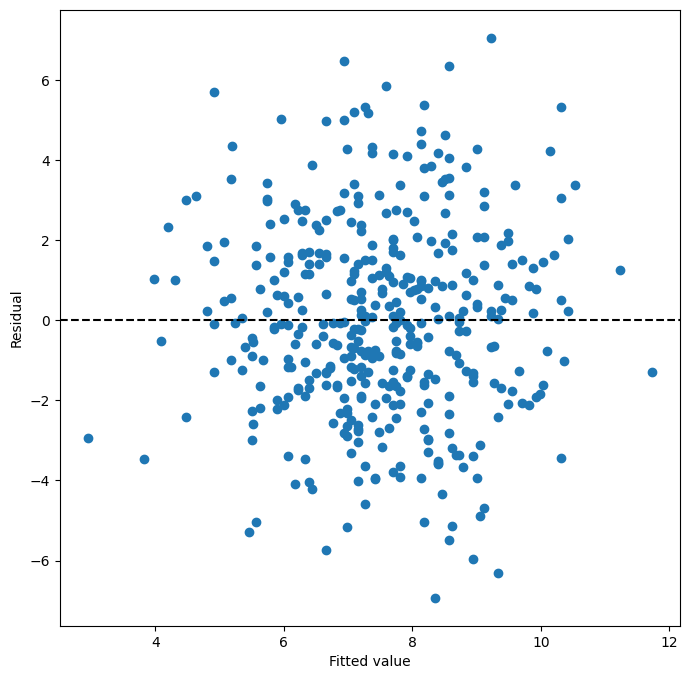

In [40]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(result_11.fittedvalues, result_11.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

42

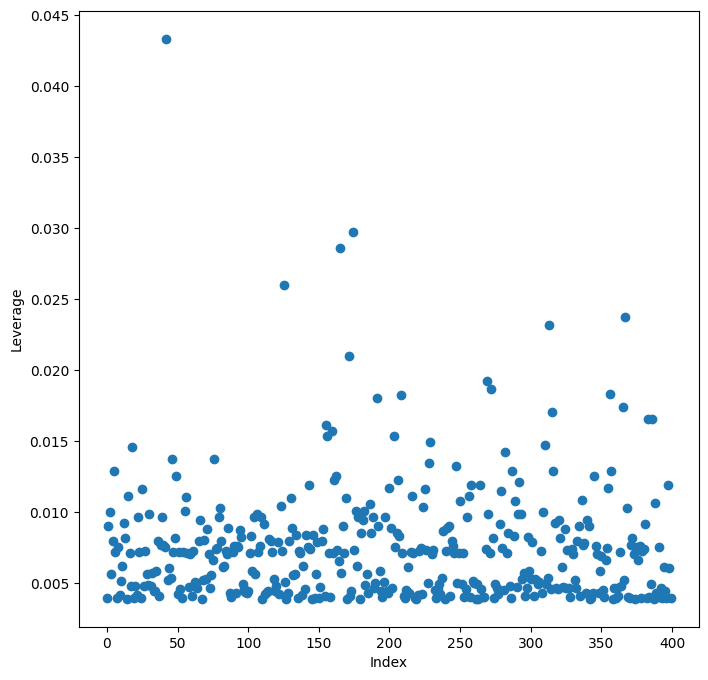

In [41]:
infl = result_11.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(x11.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)



11. In this problem we will investigate the t-statistic for the null hypothesis
H0 : β = 0 in simple linear regression without an intercept. To
begin, we generate a predictor x and a response y as follows.

In [42]:
rng = np.random.default_rng (1)
x = rng.normal(size =100)
y = 2 * x + rng.normal(size =100)

In [43]:
model_YonX= sm.OLS(y,x)
result_YonX = model_YonX.fit()
summarize(result_YonX)


,coef,std err,t,P>|t|
x1,1.9762,0.117,16.898,0.0


(b) Now perform a simple linear regression of x onto y without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H0 : β = 0. Comment on these results.

In [44]:
model_XonY = sm.OLS(x,y)
result_XonY = model_XonY.fit()
summarize(result_XonY)

,coef,std err,t,P>|t|
x1,0.3757,0.022,16.898,0.0


(c) What is the relationship between the results obtained in (a) and
(b)?

MY ANSWER:t统计量完全一样

(e) Using the results from (d), argue that the t-statistic for the regression
of y onto x is the same as the t-statistic for the regression
of x onto y.

MY ANSWER:这一题请看书上的公式，其实那个公式X和Y互换时不改变其结果

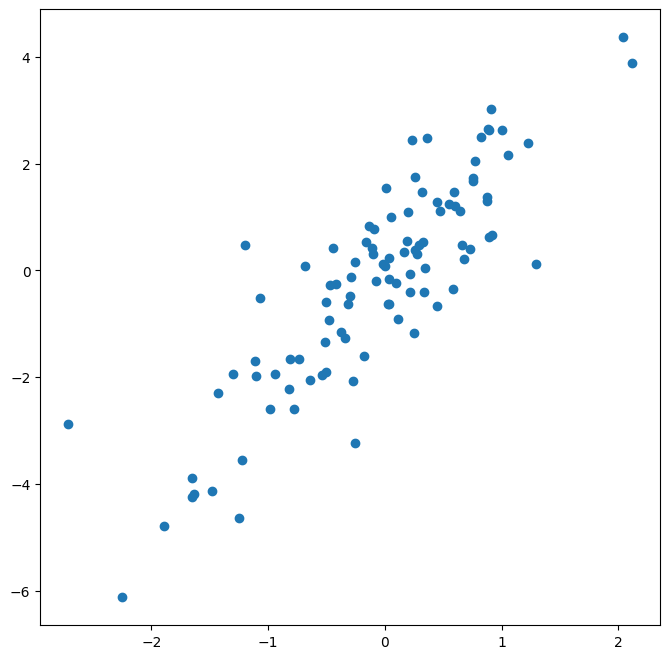

In [45]:
df = pd.DataFrame({'x': x, 'y': y})
fig, ax = subplots(figsize=(8, 8))

ax  = ax.plot(x,y,'o');

In [46]:
# abline(ax,
#        result_XonY.params[0],
#        result_XonY.params[1],
#        'r--',
#        linewidth=3)


12. This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate ˆ β for the linear regression of
Y onto X without an intercept is given by (3.38). Under what
circumstance is the coefficient estimate for the regression of X
onto Y the same as the coefficient estimate for the regression of
Y onto X?

请先看（3.38），个人理解（3.38）来自有intercept的拟合公式

MY ANSWER:当sigma square(Xi) = sigma square(Yi) 时 b0相等


(b) Generate an example in Python with n = 100 observations in
which the coefficient estimate for the regression of X onto Y
is different from the coefficient estimate for the regression of Y
onto X.

In [47]:
rng = np.random.default_rng (1)
x = rng.normal(size =100)
y = 2 * x + rng.normal(size =100)

(c) Generate an example in Python with n = 100 observations in
which the coefficient estimate for the regression of X onto Y is
the same as the coefficient estimate for the regression of Y onto
X.

In [48]:
if 3 * x is y:
    print('YES') 

In [49]:
x = rng.normal(size=100)
y = x + rng.normal(loc=0,scale=0.00001,size=100)

In [50]:
model_XonY = sm.OLS(x,y)
result_XonY = model_XonY.fit()
summarize(result_XonY)

,coef,std err,t,P>|t|
x1,1.0,9.400000e-07,1060000.0,0.0


In [51]:
model_YonX= sm.OLS(y,x)
result_YonX = model_YonX.fit()
summarize(result_YonX)



,coef,std err,t,P>|t|
x1,1.0,9.400000e-07,1060000.0,0.0


13. In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to use the default random
number generator with seed set to 1 prior to starting part (a) to
ensure consistent results.

(a) Using the normal() method of your random number generator,
create a vector, x, containing 100 observations drawn from a
N(0, 1) distribution. This represents a feature, X.

In [52]:
x = rng.normal(size=100)

(b) Using the normal() method, create a vector, eps, containing 100
observations drawn from a N(0, 0.25) distribution—a normal
distribution with mean zero and variance 0.25.

In [53]:
eps = rng.normal(loc=0,scale=0.25,size=100)

(c) Using x and eps, generate a vector y according to the model
Y = −1 + 0.5X + ϵ. (3.39)
What is the length of the vector y? What are the values of β0
and β1 in this linear model?

In [54]:
b0 = -x.std()
b0

-0.9008305010954419

In [55]:
b1 = 2*eps.std() 
b1

0.5549849684873817

In [56]:
y = b1 * x + b0

这里我想的方法错了 ，eps对应的是方程里的误差项

In [57]:
y = -1 + .5*x + eps
print('Length of y = ' + str(len(y)))

Length of y = 100


(d) Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.

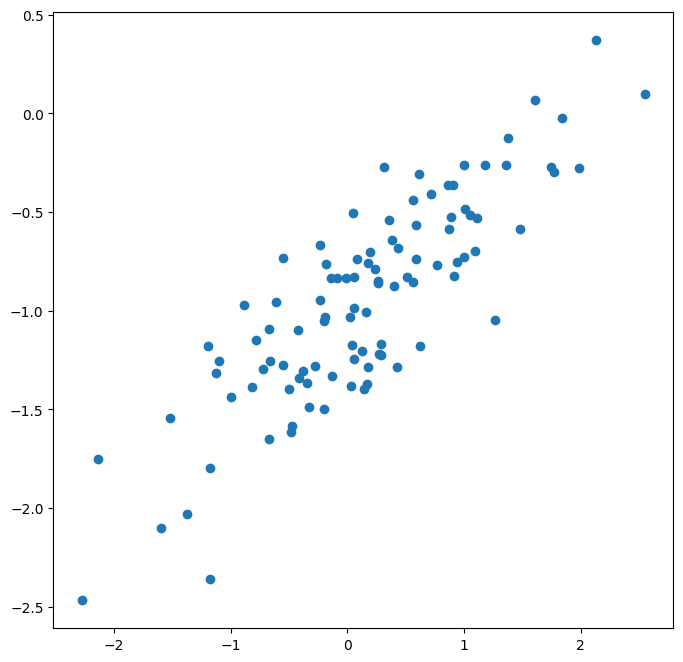

In [58]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker='o');

(e) Fit a least squares linear model to predict y using x. Comment
on the model obtained. How do ˆ β0 and ˆ β1 compare to β0 and
β1?

In [59]:
model_12_YonX = sm.OLS(y,x)
result_12 = model_12_YonX.fit()
summarize(result_12)

,coef,std err,t,P>|t|
x1,0.2976,0.115,2.595,0.011


↑上面这段代码生成的是没有intercept的OLS线性拟合函数

In [60]:
# design = MS([x])
MS?


Init signature:
MS(
    terms=[],
    intercept=True,
    categorical_features=None,
    default_encoders={'categorical': Contrast(), 'ordinal': OrdinalEncoder()},
)
Docstring:     
Parameters
----------

terms : sequence (optional)
    Sequence of sets whose
    elements are columns of *X* when fit.
    For :py:class:`pd.DataFrame` these can be column
    names.

intercept : bool (optional)
    Include a column for intercept?

categorical_features : array-like of {bool, int} of shape (n_features) 
        or shape (n_categorical_features,), default=None.
    Indicates the categorical features. Will be ignored if *X* is a :py:class:`pd.DataFrame`
    or :py:class:`pd.Series`.

    - None : no feature will be considered categorical for :py:class:`np.ndarray`.
    - boolean array-like : boolean mask indicating categorical features.
    - integer array-like : integer indices indicating categorical
      features.

default_encoders : dict
    Dictionary whose keys are elements of *terms* a

现在看到了MS函数中terms参数可以是pd.DataFrame …… column names 所以想到了先建立DateFrame再进行fit_transperant()

In [61]:
terms = pd.DataFrame({'x':x})
X = MS(['x']).fit_transform(terms)
X[:4]

,intercept,x
0,1.0,-1.372967
1,1.0,-0.551813
2,1.0,-0.475219
3,1.0,1.987510


In [62]:
model_12_YonX = sm.OLS(y,X)
result_12 = model_12_YonX.fit()
summarize(result_12)

,coef,std err,t,P>|t|
intercept,-1.0182,0.028,-35.907,0.0
x,0.4802,0.031,15.465,0.0


回顾一下原式是 " y = -1 + 0.5x + eps "

(f) Display the least squares line on the scatterplot obtained in (d).
Draw the population regression line on the plot, in a different
color. Use the legend() method of the axes to create an appropriate
legend.

In [63]:
ax.legend?

Signature: ax.legend(*args, **kwargs)
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(handles, labels)
    legend(handles=handles)
    legend(labels)

The call signatures correspond to the following different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

.. note::
    Specific artists can be excluded from the automatic legend element
    selection by using a label starting with an underscore, "_".
    A string starting with an underscore is the default label for all
    artist

In [64]:
# y1 = np.sin(x)
# y2 = np.cos(x)

# # 绘制图形
# ax.plot(x, y1, label='sin(x)')
# ax.plot(x, y2, label='cos(x)')

# # 添加图例
# ax.legend()

# # 显示图形
# # ax.show()
# fig

上面这段代码是ax.legend()的测试代码

In [65]:
# abline(ax,result_12.para)
abline(ax,
       result_12.params[0],
       result_12.params[1],
       'r--',
       linewidth=3,
       label = 'fit')

In [66]:
abline(ax,
       -1,
       0.5,
       'g--',
       linewidth=3,
       label = 'population')

经过了多次尝试后，发现在abline的参数最后加上 label = 'fit' label = 'population' 是正确的！

In [67]:
# ax.plot(X,y,label = 'fit')
# ax.plot(x,y,label = 'pop')

# ax.legend(label = 'fit:red')
# ax.legend(label = 'pop:green')

ax.legend()

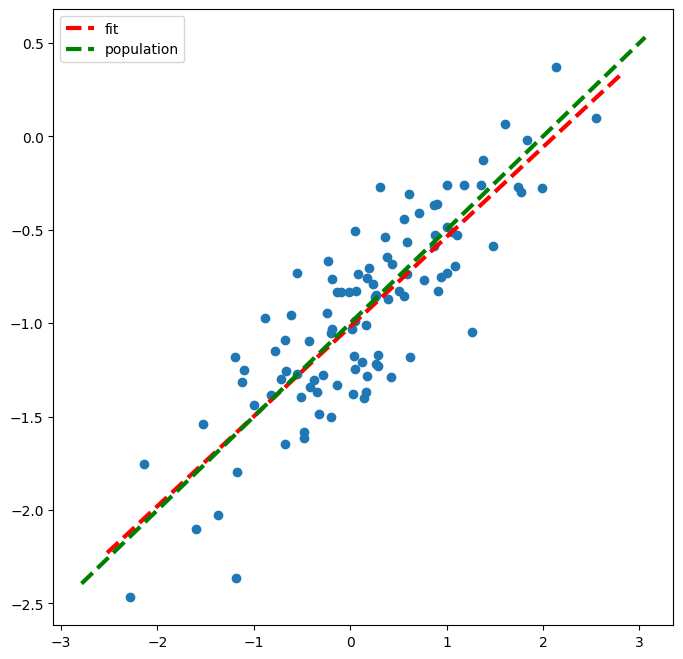

In [68]:
fig

NBBBBBBBBBBBBBBBBBBBBBBBBBBBBB!!!!!!!!!!!!!!!!!!!!!!!!!!

这题的解题过程是想到了*arg and *kwargs是类似 "无限量" 的参数，结合abline函数的构造过程 才解的此题

(g) Now fit a polynomial regression model that predicts y using x
and x2. Is there evidence that the quadratic term improves the
model fit? Explain your answer.

In [69]:
X2 = MS([poly('x',degree=2)]).fit_transform(terms)
model2 = sm.OLS(y,X2)
result2 = model2.fit()

method 1:" .summary() " and compare to the R-squared and F-statistic "

In [70]:
result_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     239.2
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           4.82e-28
Time:                        15:14:09   Log-Likelihood:                -13.492
No. Observations:                 100   AIC:                             30.98
Df Residuals:                      98   BIC:                             36.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0182      0.028    -35.907      0.000      -1.074      -0.962
x              0.4802      0.031     15.465      0.000       0.419       0.542
==============================================================================
Omnibus:                        1.731   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.421   Jarque-Bera (JB):                1.602
Skew:                          -0.198   Prob(JB):                        0.449
Kurtosis:                       2.524   Cond. No.                         1.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     118.5
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           9.01e-27
Time:                        15:14:09   Log-Likelihood:                -13.448
No. Observations:                 100   AIC:                             32.90
Df Residuals:                      97   BIC:                             40.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -0.9463      0.028    -33.672      0.000      -1.002      -0.891
poly(x, degree=2)[0]     4.3262      0.281     15.393      0.000       3.768       4.884
poly(x, degree=2)[1]    -0.0821      0.281     -0.292      0.771      -0.640       0.476
==============================================================================
Omnibus:                        1.814   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.637
Skew:                          -0.194   Prob(JB):                        0.441
Kurtosis:                       2.508   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

mothed 2: " anovan_lm "

In [72]:
anova_lm(result_12,result2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,7.668534,0.0,NaN,NaN,NaN
1,97.0,7.661791,1.0,0.006743,0.085371,0.770771


(i) Repeat (a)–(f) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term ϵ in (b). Describe your results.

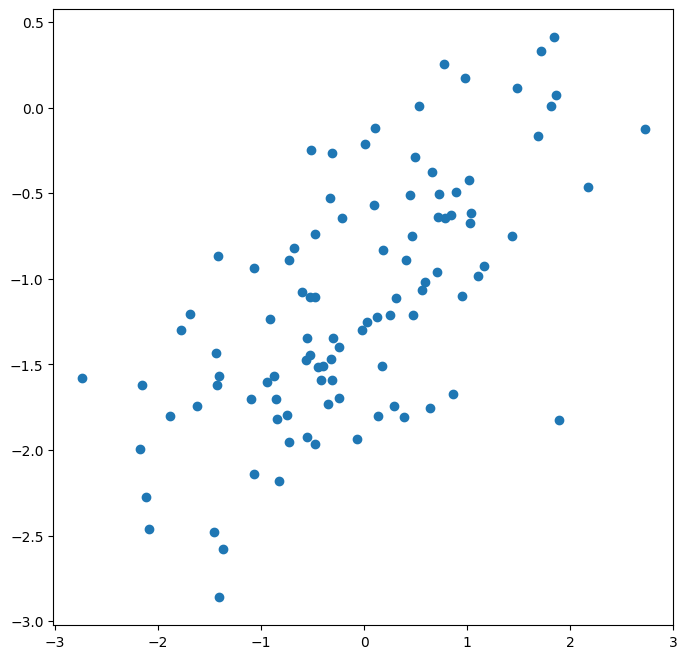

In [73]:
x = rng.normal(size=100)
eps = rng.normal(loc=0,scale=0.5,size=100)

y = -1 + .5*x + eps
# print('Length of y = ' + str(len(y)))

fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker='o');

In [74]:
terms = pd.DataFrame({'x':x})
X = MS(['x']).fit_transform(terms)
X[:4]

,intercept,x
0,1.0,-0.854651
1,1.0,0.705142
2,1.0,1.895977
3,1.0,0.386499


In [75]:
model_12_YonX = sm.OLS(y,X)
result_12 = model_12_YonX.fit()
summarize(result_12)

,coef,std err,t,P>|t|
intercept,-1.1021,0.053,-20.604,0.0
x,0.4289,0.049,8.726,0.0


In [76]:
abline(ax,
       result_12.params[0],
       result_12.params[1],
       'r--',
       linewidth=3,
       label = 'fit')

In [77]:
abline(ax,
       -1,
       0.5,
       'g--',
       linewidth=3,
       label = 'population')

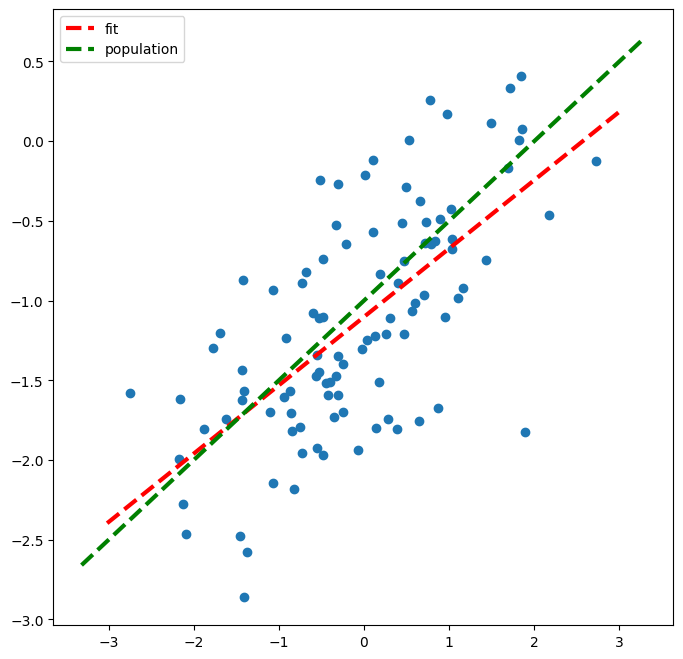

In [78]:
ax.legend()
fig

In [79]:
result_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     76.14
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           7.00e-14
Time:                        15:14:10   Log-Likelihood:                -77.954
No. Observations:                 100   AIC:                             159.9
Df Residuals:                      98   BIC:                             165.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.1021      0.053    -20.604      0.000      -1.208      -0.996
x              0.4289      0.049      8.726      0.000       0.331       0.526
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.505
Skew:                          -0.118   Prob(JB):                        0.777
Kurtosis:                       2.744   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Right anwer : have a much worse fit.The R-squared is just 0.431 and the confidence intervals for the coefficients are much wider. Still there's no doubt we are in the presence of a statistically significant relationship, with very low p-values.



15. This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.

(a) For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions

In [80]:
boston = load_data('Boston')
boston.shape

(506, 13)

In [81]:
y = boston['crim']
boston.columns[1]

'zn'

这里是要挨个准备predictor , 所以想写一个 df 来实现

In [82]:
def make_xi():
    arr = []
    for i in range(1,boston.shape[1]):
       arr.append(MS(boston.columns[i]).fit_transform(boston))

    model = [] 
    for i in range(0,boston.shape[1]-1):
        pred_name = f'pred\_{i}'
        model[pred_name] = sm.OLS(y,arr[i])
#    xi =  MS(boston.columns[i]).fit_transform(boston)
    
        

In [83]:
# make_xi()